<a href="https://colab.research.google.com/github/karnali/covid_19_colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Reading the dataset https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-04-2020.csv')


In [3]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
Province/State    82 non-null object
Country/Region    160 non-null object
Last Update       160 non-null object
Confirmed         160 non-null int64
Deaths            160 non-null int64
Recovered         160 non-null int64
Latitude          160 non-null float64
Longitude         160 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 10.1+ KB


In [4]:
df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,160.000000,160.000000,160.00000,160.000000,160.000000
mean,594.525000,20.337500,319.81875,31.489201,22.192458
std,5342.360241,227.078794,3049.87881,21.385386,87.700619
min,0.000000,0.000000,0.00000,-41.454500,-123.869500
25%,1.000000,0.000000,0.00000,26.631275,-71.080400
50%,6.500000,0.000000,0.00000,35.901600,24.801600
75%,75.000000,1.000000,13.00000,43.218125,108.808600
max,67332.000000,2871.000000,38557.00000,64.963100,174.886000


In [5]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['Mainland China', 'South Korea', 'Italy', 'Iran', 'Others', 'Japan', 'France', 'Germany', 'Spain', 'Singapore', 'Hong Kong', 'Switzerland', 'UK', 'Kuwait', 'Norway', 'Bahrain', 'Malaysia', 'US', 'Thailand', 'Taiwan', 'Netherlands', 'Iraq', 'Sweden', 'Austria', 'India', 'United Arab Emirates', 'Iceland', 'Belgium', 'Australia', 'Canada', 'San Marino', 'Vietnam', 'Israel', 'Oman', 'Lebanon', 'Algeria', 'Croatia', 'Denmark', 'Ecuador', 'Macau', 'Greece', 'Czech Republic', 'Qatar', 'Belarus', 'Finland', 'Ireland', 'Mexico', 'Pakistan', 'Portugal', 'Brazil', 'Romania', 'Senegal', 'Azerbaijan', 'Georgia', 'New Zealand', 'Philippines', 'Russia', 'Saint Barthelemy', 'Egypt', 'Estonia', 'Hungary', 'Indonesia', 'Afghanistan', 'Andorra', 'Argentina', 'Armenia', 'Cambodia', 'Chile', 'Dominican Republic', 'Faroe Islands', 'Gibraltar', 'Jordan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Monaco', 'Morocco', 'Nepal', 'Nigeria', 'North Macedonia', 'Poland', 'Saudi Arabia', 'Sri Lanka', 'T

In [6]:
#Combining China and Mainland China cases
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['China', 'South Korea', 'Italy', 'Iran', 'Others', 'Japan', 'France', 'Germany', 'Spain', 'Singapore', 'Hong Kong', 'Switzerland', 'UK', 'Kuwait', 'Norway', 'Bahrain', 'Malaysia', 'US', 'Thailand', 'Taiwan', 'Netherlands', 'Iraq', 'Sweden', 'Austria', 'India', 'United Arab Emirates', 'Iceland', 'Belgium', 'Australia', 'Canada', 'San Marino', 'Vietnam', 'Israel', 'Oman', 'Lebanon', 'Algeria', 'Croatia', 'Denmark', 'Ecuador', 'Macau', 'Greece', 'Czech Republic', 'Qatar', 'Belarus', 'Finland', 'Ireland', 'Mexico', 'Pakistan', 'Portugal', 'Brazil', 'Romania', 'Senegal', 'Azerbaijan', 'Georgia', 'New Zealand', 'Philippines', 'Russia', 'Saint Barthelemy', 'Egypt', 'Estonia', 'Hungary', 'Indonesia', 'Afghanistan', 'Andorra', 'Argentina', 'Armenia', 'Cambodia', 'Chile', 'Dominican Republic', 'Faroe Islands', 'Gibraltar', 'Jordan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Monaco', 'Morocco', 'Nepal', 'Nigeria', 'North Macedonia', 'Poland', 'Saudi Arabia', 'Sri Lanka', 'Tunisia', 

In [0]:
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Creating a dataframe with total no of confirmed cases for every Country/Region
Number_of_countries = len(df['Country/Region'].value_counts())
cases = pd.DataFrame(df.groupby('Country/Region')['Confirmed','Deaths'].sum())
cases['Country/Region'] = cases.index
global_cases = cases[['Confirmed','Deaths']]

dfsort = global_cases.sort_values(by = ['Deaths'], ascending = False)
dfsort.to_csv('today.csv',index=True)


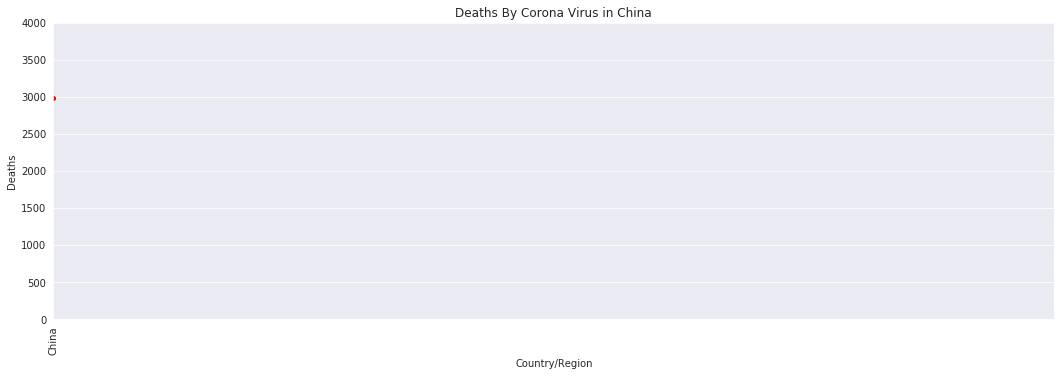

In [8]:
sns.set_style("darkgrid")
dfchina = pd.read_csv('today.csv', skiprows = range(2,200))
ax = sns.relplot(x="Country/Region", y="Deaths", aspect = 3, color="r", data=dfchina)
ax.set(ylim=(0, 4000))
ax.set(xlim=(0, 2))
plt.title('Deaths By Corona Virus in China')
ax.set_xticklabels(rotation=90)


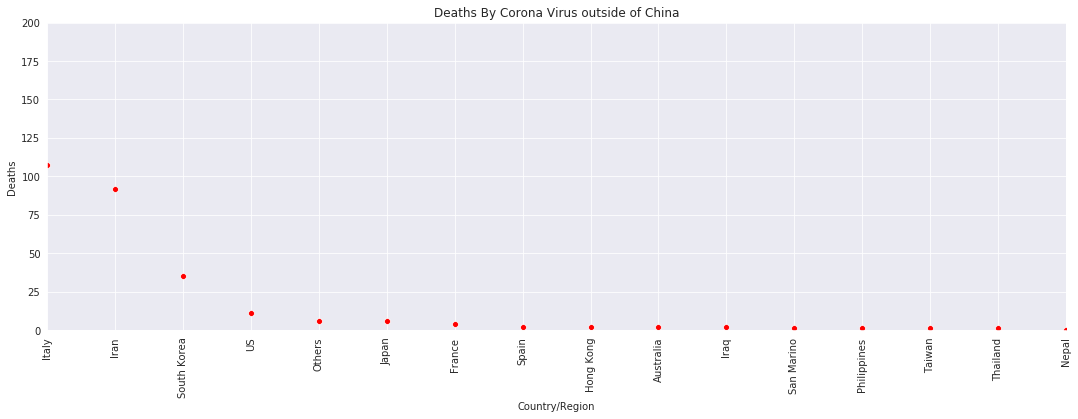

In [9]:
sns.set_style("darkgrid")
dfglobal = pd.read_csv('today.csv', skiprows=[1])
ax = sns.relplot(x="Country/Region", y="Deaths", aspect = 3, color="r", data=dfglobal)
ax.set(ylim=(0, 200))
ax.set(xlim=(0, 15))
plt.title('Deaths By Corona Virus outside of China')
ax.set_xticklabels(rotation=90)
